In [101]:
import pandas as pd

In [102]:
data_url= "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"
dataframe = pd.read_table(data_url)

In [103]:
dataframe[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [104]:
dataframe.shape

(19583, 11)

In [105]:
dataframe.dtypes

who                      object
Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Country                  object
Education Attainment     object
Major Occupation         object
Marital Status           object
Years on Internet        object
dtype: object

In [106]:
dataframe["Marital Status"].unique()

array(['Other', 'Married', 'Single', 'Divorced', 'Widowed', nan,
       'Separated'], dtype=object)

In [107]:
dataframe.pop('who') # dataframe = dataframe.ix[:, 1:]
dataframe.pop('Country')
dataframe.pop('Years on Internet')

dataframe.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [108]:
dataframe["Gender"] = dataframe["Gender"].astype("category")
dataframe.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income          object
Sexual Preference         object
Education Attainment      object
Major Occupation          object
Marital Status            object
dtype: object

In [109]:
for col in ['Household Income', 'Sexual Preference', 'Education Attainment', 'Major Occupation', "Marital Status"]:
    dataframe[col] = dataframe[col].astype('category')
dataframe.dtypes    

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [110]:
dataframe_modified = pd.get_dummies(dataframe)
dataframe_modified[:5]

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [111]:
dataframe_modified.shape

(19583, 38)

In [112]:
dataframe_modified['Age'][pd.isnull(dataframe_modified['Age'])] = dataframe_modified['Age'].mean()

/Users/sungchulchoi/miniconda3/envs/ml_python/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [113]:
x_data = dataframe_modified.iloc[:, 1:].as_matrix()
y_data = dataframe_modified.iloc[:, 0].as_matrix().reshape(-1, 1)
y_data.shape, x_data.shape

((19583, 1), (19583, 37))

In [114]:
from sklearn import preprocessing # Min-Max Standardzation

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [115]:
import numpy as np 

training_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0] * 0.8))
test_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0] * 0.2))

x_training, x_test = x_data[training_idx,:], x_data[test_idx,:]
y_training, y_test = y_data[training_idx,:], y_data[test_idx,:]

x_training.shape, x_test.shape

((15666, 37), (3916, 37))

In [116]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression(fit_intercept=True)
logreg.fit(x_training, y_training.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
sum(logreg.predict(x_test) == y_test.ravel())  / y_test.shape[0]

0.75612870275791622

In [124]:
y_score = logreg.predict_proba(x_test)[:,1]
y_score[:5]

array([ 0.1936566 ,  0.25098807,  0.05545255,  0.43020585,  0.55797328])

In [126]:
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test.flatten(), y_score, pos_label=1)
metrics.auc(fpr,tpr)

0.73403353166879826

In [ ]:
from sklearn.metrics import roc_auc_score

In [127]:
roc_auc_score(y_test.flatten(), y_score)

0.73403353166879826

In [135]:

roc_auc = dict()
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = metrics.auc(fpr, tpr)

In [136]:
fpr

array([  0.00000000e+00,   3.40599455e-04,   3.40599455e-04, ...,
         9.96594005e-01,   9.97615804e-01,   1.00000000e+00])

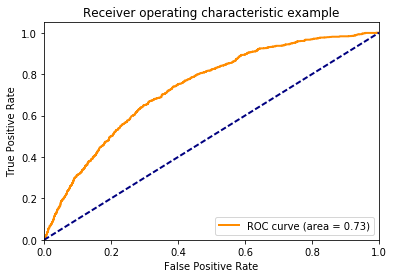

In [138]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()